<a href="https://colab.research.google.com/github/ananyabharti01/CodSoft-Data-Science-Internship/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOVIE IMDB RATING PREDICTION**

Build a model that predicts the rating of a movie based on features like genre, director, and actors.

### **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, r2_score,mean_squared_error,mean_absolute_error
from sklearn.impute import SimpleImputer

### **Importing Dataset**

In [11]:
df = pd.read_csv("/content/IMDb Movies India.csv.zip", encoding='ISO-8859-1')
df


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


### **Numerical Information**

In [12]:
df.info()
print(df.shape)
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
(15509, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


### **Data Cleaning**

In [13]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

### **Averaging The Column Elements**

In [14]:
df['Genre_Average_Rating'] = df.groupby('Genre')['Rating'].transform('mean')
df['Director_Average_Rating'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor1_Average_Rating'] = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor2_Average_Rating'] = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor3_Average_Rating'] = df.groupby('Actor 3')['Rating'].transform('mean')

### **Training The Model**

### **1. Define feature and target variables**

In [15]:
X = df[['Year', 'Votes', 'Duration', 'Genre_Average_Rating', 'Director_Average_Rating', 'Actor1_Average_Rating', 'Actor2_Average_Rating', 'Actor3_Average_Rating']]
y = df['Rating']

### **2. Train the Random Forest Model And Heatmap**

Unique values in 'Rating' column before cleaning: [ 7.   4.4  4.7  7.4  5.6  4.   6.2  5.9  6.5  5.7  6.3  7.2  6.6  7.3
  7.1  6.9  3.5  4.5  6.4  4.1  4.8  8.1  5.5  6.8  5.   6.1  7.7  5.1
  3.3  7.8  8.4  4.3  5.8  7.5  3.6  4.6  4.2  5.3  5.4  3.   8.   6.
  3.1  3.8  7.9  2.7  2.4  7.6  6.7  3.4  5.2  4.9  2.8  3.7  3.9  3.2
  2.9  8.2  8.7  8.3  9.3  8.8  2.1  2.5  2.3  8.5  8.6  2.6  1.7  9.
  1.4  8.9  1.9  9.4  9.7  1.8  9.2  2.   9.1 10.   1.6  2.2  1.1]
Unique values in 'Rating' column after cleaning: [ 7.   4.4  4.7  7.4  5.6  4.   6.2  5.9  6.5  5.7  6.3  7.2  6.6  7.3
  7.1  6.9  3.5  4.5  6.4  4.1  4.8  8.1  5.5  6.8  5.   6.1  7.7  5.1
  3.3  7.8  8.4  4.3  5.8  7.5  3.6  4.6  4.2  5.3  5.4  3.   8.   6.
  3.1  3.8  7.9  2.7  2.4  7.6  6.7  3.4  5.2  4.9  2.8  3.7  3.9  3.2
  2.9  8.2  8.7  8.3  9.3  8.8  2.1  2.5  2.3  8.5  8.6  2.6  1.7  9.
  1.4  8.9  1.9  9.4  9.7  1.8  9.2  2.   9.1 10.   1.6  2.2  1.1]
Unique values in 'Votes' column before cleaning: ['8' '35' '8

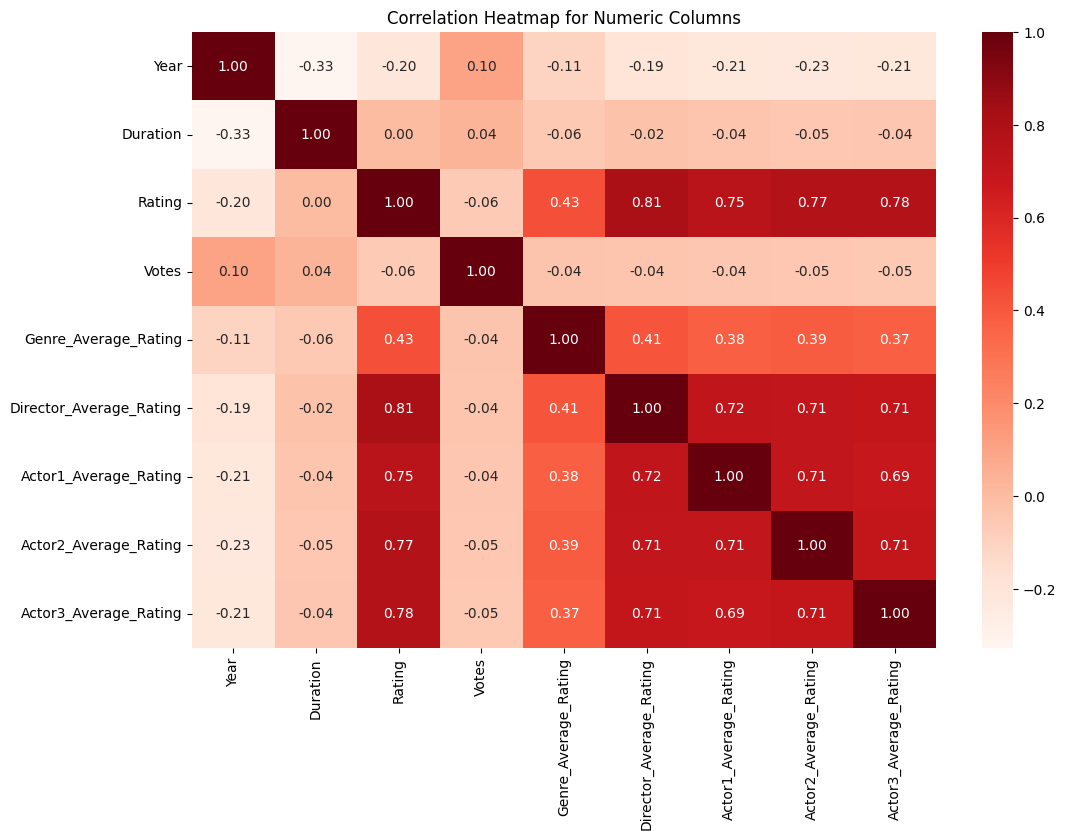

Random Forest Mean Squared Error: 0.38473747879858655
Linear Regression Mean Squared Error: 0.4309157525513216


In [16]:
print("Unique values in 'Rating' column before cleaning:", df['Rating'].unique())
print("Unique values in 'Rating' column after cleaning:", df['Rating'].unique())
print("Unique values in 'Votes' column before cleaning:", df['Votes'].unique())
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
print("Unique values in 'Votes' column after cleaning:", df['Votes'].unique())
print("Unique values in 'Year' column before cleaning:", df['Year'].unique())
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
print("Unique values in 'Year' column after cleaning:", df['Year'].unique())
print("Unique values in 'Duration' column before cleaning:", df['Duration'].unique())
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
print("Unique values in 'Duration' column after cleaning:", df['Duration'].unique())

categorical_columns = []
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df = df.select_dtypes(include=[np.number])
df = df.dropna(subset=['Rating'])

X = df.drop(columns=['Rating'])
y = df['Rating']

imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(random_state=42)
linear_regression_model = LinearRegression()

random_forest_model.fit(X_train, y_train)
linear_regression_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)
y_pred_lr = linear_regression_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Data types in the dataset:")
print(df.dtypes)
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.fillna(numeric_df.median(), inplace=True)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Linear Regression Mean Squared Error: {mse_lr}")

### **Visualization Of The Numerical Features (Histogram)**

### **1.Numeric Features**

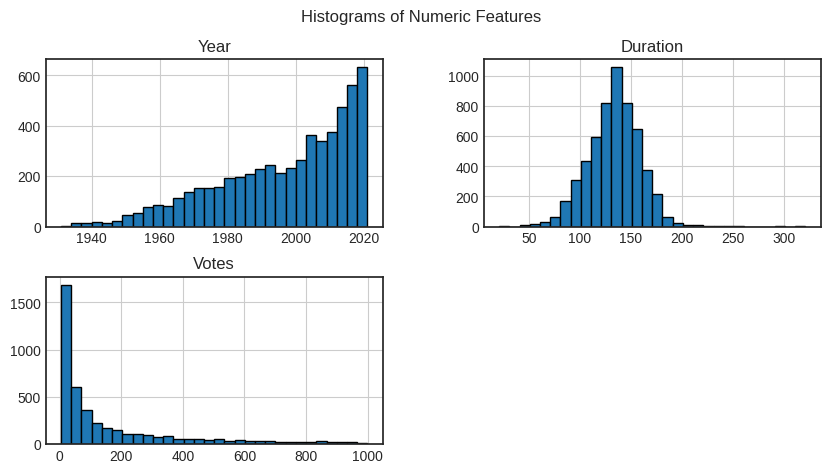

In [17]:
plt.style.use('seaborn-v0_8-white')
df[['Year', 'Duration', 'Votes']].hist(bins=30, edgecolor='black', figsize=(10, 5))
plt.suptitle('Histograms of Numeric Features')
plt.show()

### **2.Distribution Of Rating**

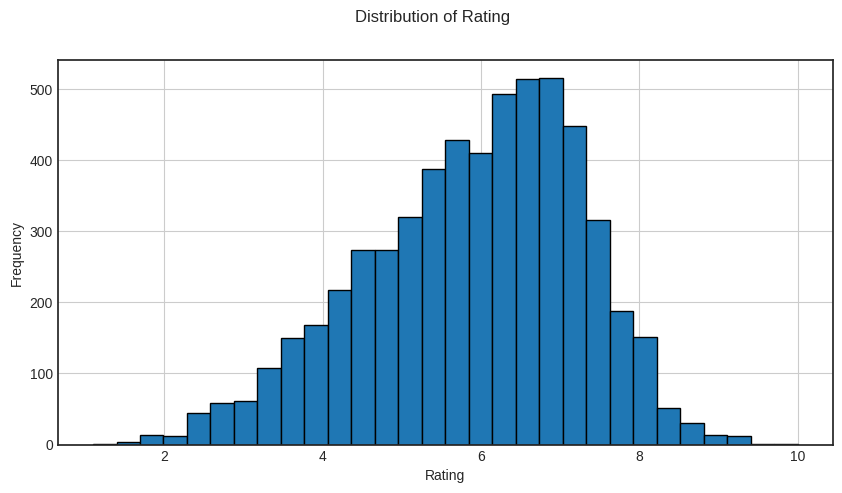

In [18]:
df['Rating'].hist(bins=30, edgecolor='black', figsize=(10, 5))
plt.suptitle('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### **3. Top 10 Directors**

<ipython-input-20-ea5302cbb21e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='Dark2')


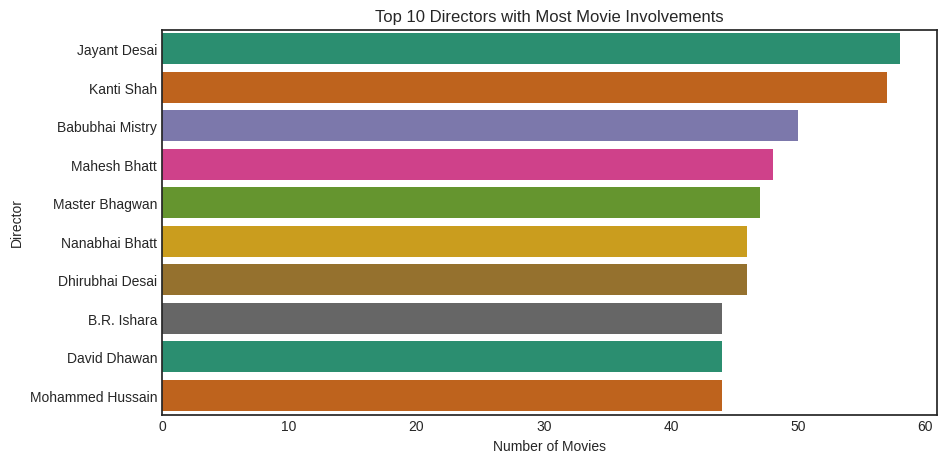

In [20]:
df = pd.read_csv("/content/IMDb Movies India.csv.zip", encoding='ISO-8859-1')
top_10_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='Dark2')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

### **4. Top 10 Genres**

<ipython-input-21-ce0b86ab2f52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='muted')


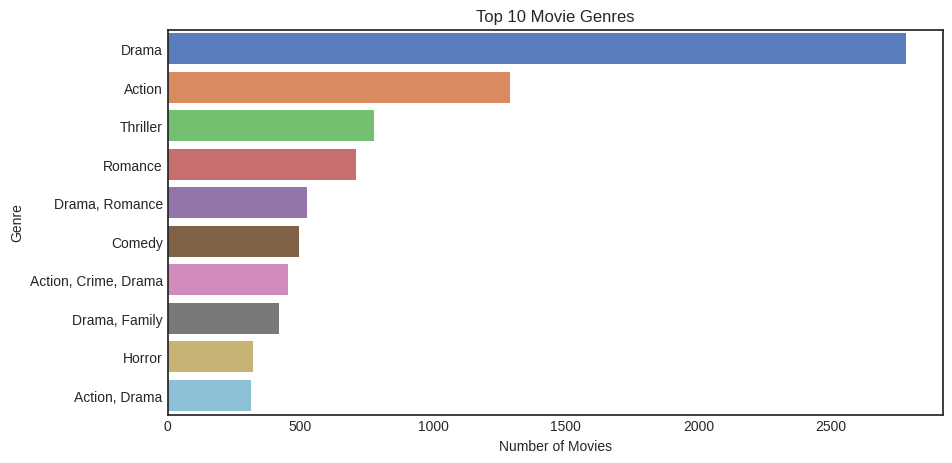

In [21]:
top_10_genres = df['Genre'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

### **5.Linear Regression Result**

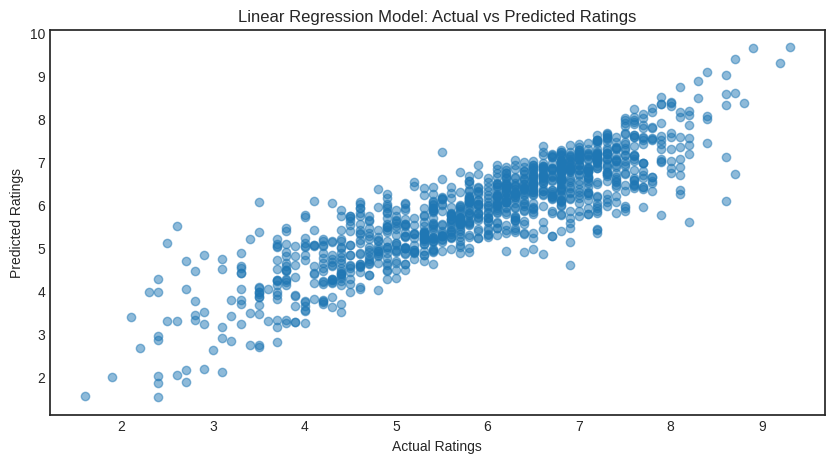

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

### **6.Random Forest Result**

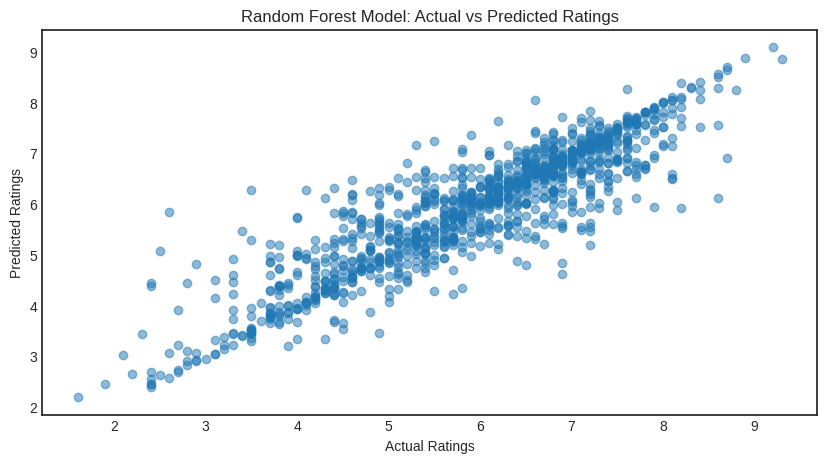

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

### **Model Evaluation**

In [24]:
y_pred_rf = random_forest_model.predict(X_test)
print("Performance Evaluation for Random Forest Model:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}")

Performance Evaluation for Random Forest Model:
Mean Squared Error: 0.38473747879858655
Mean Absolute Error: 0.42001060070671375
R2 Score: 0.7922296211992341
